In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("https://www.kaggle.com/deepu1109/star-dataset",header=0)

In [3]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


# Dataset

### Astronomy 

The invention of Telescope made it possible to observe distant astronomical objects and study them.This gave rise to a whole new subject of study called Astronomy, it is the Study of extra terrestial objects. Today due to advancement in technology and our knowledge it is even possible to know a lot of things about planets and stars which are a few hundred light years away from us.
The stars follow a certain graph in celestial Space specifically called Hertzsprung-Russell Diagram or Simply HR-Diagram.

The dataset I have choosen for the project is about identifying the type of a star based on some attributes like its Temperature, Luminosity, Radius, Absolute Magnitude, Color and Spectral Class.

Temperature: in Kelvin

L: L/Lo Luminosity of the Star wrt Luminosity of the sun (Layman's terms: Brightness of Stars)

R: R/Ro Radius of the Star wrt Radius of the sun

A_M: Mv Absolute Magnitude which is the measure of luminosity on inverse logarithmic astronomical magnitude scale. Defination says: Apparent magnitude that the object would have if it were viewed from a distance of 32.6 light years away without extinction of its light due to absorbtion by interstellar matter and cosmic dust.

Color: Color of the Star

Spectral_Class: Electromagnetic radiations from the stars are diffracted using Prism. Each line shows presence of a particular chemical element and line strength indicating abundance of a particular element (Here the classes are classified using Morgan-Keenan System using letters 0,B,A,F,G,K,M where 0 is hottest and M is coolest)

Type:

1) 0: Red Dwarf (Coolest Kind of Star)

2) 1: Brown Dwarf (mass approx 13-80 times that of Jupiter) 

3) 2: White Dwarf (Dense star with more mass(Sun) and less volume(Earth)) 

4) 3: Main Sequence (Example: Sun)

5) 4: Super Giants (Massive and Luminious Stars)
 
6) 5: Hyper Giants (Rare to find)

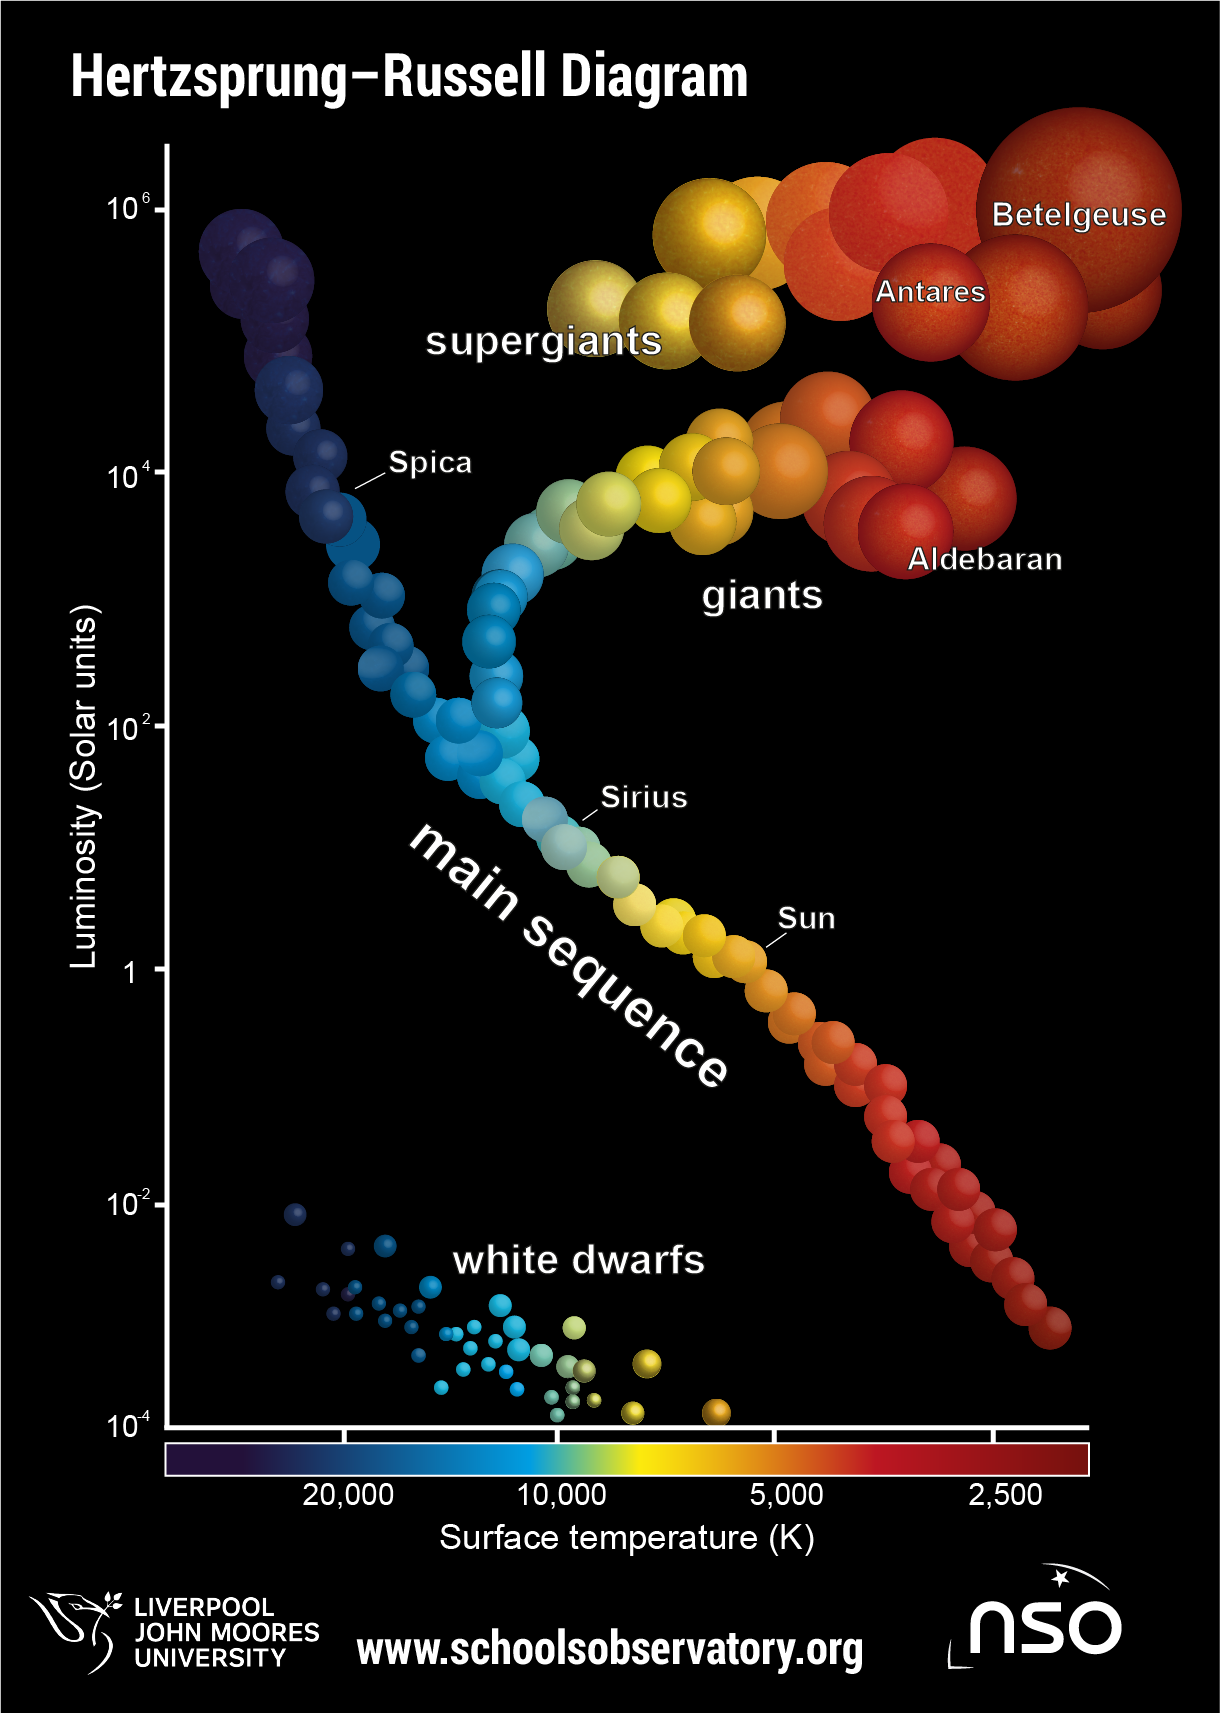

### Checking the dataset 

In [4]:
df.shape

(240, 7)

In [5]:
df.columns

Index(['Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class', 'Type'], dtype='object')

In [6]:
df["Type"].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Type, dtype: int64

In [7]:
df.isna().sum()

Temperature       0
L                 0
R                 0
A_M               0
Color             0
Spectral_Class    0
Type              0
dtype: int64

##### Since the dataset has no missing values we donot need to do further process of handeling missing values

In [8]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [9]:
df.tail()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
235,38940,374830.0,1356.0,-9.93,Blue,O,5
236,30839,834042.0,1194.0,-10.63,Blue,O,5
237,8829,537493.0,1423.0,-10.73,White,A,5
238,9235,404940.0,1112.0,-11.23,White,A,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


## Analysis

### Analysis on Temperature

In [10]:
mint=df['Temperature'].min()
maxt=df['Temperature'].max()
print("Minimum Temperature: ",mint)
print("Maximum Temperature: ",maxt)

Minimum Temperature:  1939
Maximum Temperature:  40000


#### Checking for Outliers

C:\Users\Anuya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Temperature'>

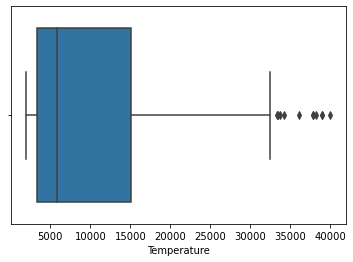

In [11]:
sns.boxplot(df["Temperature"])

In [12]:
Q1=df.Temperature.quantile(0.25)
Q3=df.Temperature.quantile(0.75)
IQR=Q3-Q1
u=Q3+(1.5*IQR)
L=Q1-(1.5*IQR)
df2=df[(df["Temperature"]<L)|(df["Temperature"]>u)]
print("Number of Outliers: ", df2.shape[0])

Number of Outliers:  11


We have 11 outliers that will affect our Analysis. So we treat the Outliers.

In [13]:
for i,data in df.iterrows():
    if data["Temperature"]<L:
        df.at[i,"Temperature"]=L
    elif data["Temperature"]>u:
        df.at[i,"Temperature"]=u

#### Vizualization

In [14]:
temp = df.groupby('Type').mean()['Temperature'].sort_values(ascending=False).reset_index()
temp

,Type,Temperature
0,3,15602.750
1,4,15098.275
2,2,13931.450
3,5,10975.950
4,1,3283.825
5,0,2997.950


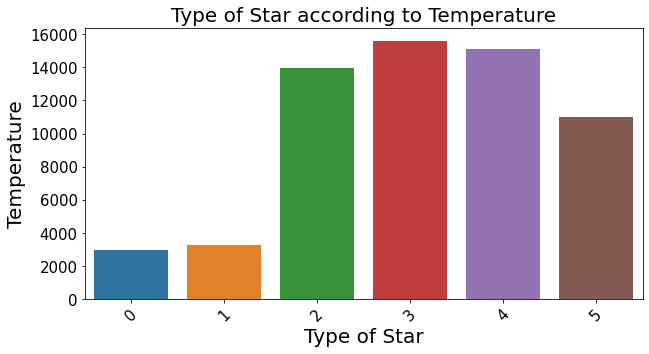

In [15]:
plt.figure(figsize=(10,5))
plt.title('Type of Star according to Temperature',fontsize = 20)
sns.barplot(x = 'Type',y = 'Temperature',data = temp)
plt.xticks(rotation = 45 , fontsize = 15) #rotating the labels on x-axis 
plt.yticks(fontsize = 15) 
plt.xlabel("Type of Star",fontsize = 20)
plt.ylabel("Temperature",fontsize = 20)
plt.show()

Our Analysis here shows that Type 3 stars are having maximum temperature followed by Type 4 and the coolest ones are Type 1 and Type 0.

### Analysis on L (Luminosity of the Star)

In [16]:
minl=df['L'].min()
maxl=df['L'].max()
print("Minimum Luminosity with Respect to that of Sun: ",minl)
print("Maximum Luminosity with Respect to that of Sun: ",maxl)

Minimum Luminosity with Respect to that of Sun:  8e-05
Maximum Luminosity with Respect to that of Sun:  849420.0


#### Checking for Outliers

C:\Users\Anuya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='L'>

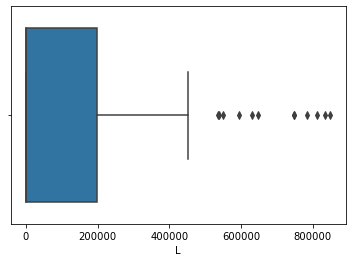

In [17]:
sns.boxplot(df["L"])

In [18]:
Q1=df.L.quantile(0.25)
Q3=df.L.quantile(0.75)
IQR=Q3-Q1
u=Q3+(1.5*IQR)
L=Q1-(1.5*IQR)
df2=df[(df["L"]<L)|(df["L"]>u)]
print("Number of Outliers: ", df2.shape[0])

Number of Outliers:  12


We can see that there are Outliers in this Column, so we treat the Outliers.

In [19]:
for i,data in df.iterrows():
    if data["L"]<L:
        df.at[i,"L"]=L
    elif data["L"]>u:
        df.at[i,"L"]=u

#### Vizualization

In [20]:
l = df.groupby('Type').mean()['L'].sort_values(ascending=False).reset_index()
l

,Type,L
0,4,276778.124838
1,5,275946.524773
2,3,32067.386275
3,1,0.005406
4,2,0.002434
5,0,0.000693


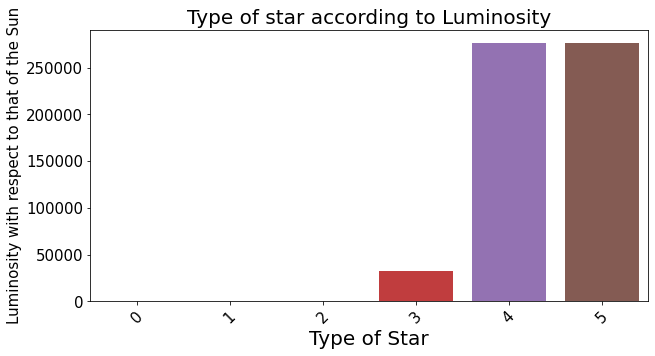

In [21]:
plt.figure(figsize=(10,5))
plt.title('Type of star according to Luminosity',fontsize = 20)
sns.barplot(x = 'Type',y = 'L',data = l)
plt.xticks(rotation = 45 , fontsize = 15) 
plt.yticks(fontsize = 15) 
plt.xlabel("Type of Star",fontsize = 20)
plt.ylabel("Luminosity with respect to that of the Sun",fontsize = 15)
plt.show()

This shows that Type 5 and Type 4 stars have maximum Luminosity with Respect to that of Sun while Type 1,2,0 have least Luminosity with Respect to that of Sun.

### Analysis on R ( Radius of the Star)

In [22]:
minr=df['R'].min()
maxr=df['R'].max()
print("Minimum Radius with Respect to that of Sun: ",minr)
print("Maximum Radius with Respect to that of Sun: ",maxr)

Minimum Radius with Respect to that of Sun:  0.0084
Maximum Radius with Respect to that of Sun:  1948.5


#### Outliers

C:\Users\Anuya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='R'>

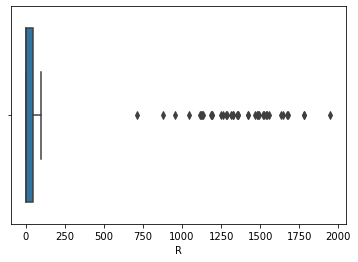

In [23]:
sns.boxplot(df["R"])

In [24]:
Q1=df.R.quantile(0.25)
Q3=df.R.quantile(0.75)
IQR=Q3-Q1
u=Q3+(1.5*IQR)
L=Q1-(1.5*IQR)
df2=df[(df["R"]<L)|(df["R"]>u)]
print("Number of Outliers: ", df2.shape[0])

Number of Outliers:  40


This shows that we have Outliers which we need to treat.

In [25]:
for i,data in df.iterrows():
    if data["R"]<L:
        df.at[i,"R"]=L
    elif data["R"]>u:
        df.at[i,"R"]=u

#### Vizualizations

In [26]:
r = df.groupby('Type').mean()['R'].sort_values(ascending=False).reset_index()
r

,Type,R
0,5,106.720875
1,4,51.150000
2,3,4.430300
3,1,0.348145
4,0,0.110015
5,2,0.010728


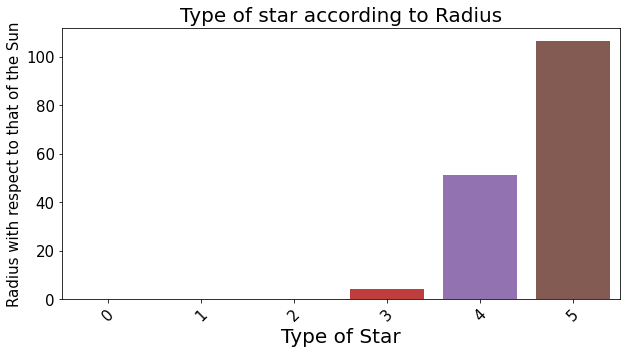

In [27]:
plt.figure(figsize=(10,5))
plt.title('Type of star according to Radius',fontsize = 20)
sns.barplot(x = 'Type',y = 'R',data = r)
plt.xticks(rotation = 45 , fontsize = 15)
plt.yticks(fontsize = 15) 
plt.xlabel("Type of Star",fontsize = 20)
plt.ylabel("Radius with respect to that of the Sun",fontsize = 15)
plt.show()

This shows that Type 5 star is having maximum Radius with Respect to that of Sun while Type 1,2,0 have least Radius with Respect to that of Sun.

### Analysis on A_M (Absolute Magnitude of the Star)

In [28]:
minam=df['A_M'].min()
maxam=df['A_M'].max()
print("Minimum Absolute Magnitude: ",minam)
print("Maximum Absolute Magnitude: ",maxam)

Minimum Absolute Magnitude:  -11.92
Maximum Absolute Magnitude:  20.06


#### Outliers

C:\Users\Anuya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='A_M'>

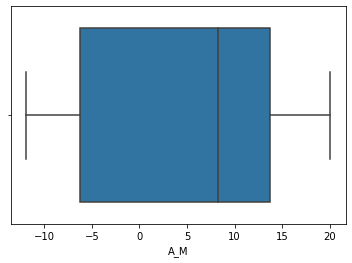

In [29]:
sns.boxplot(df["A_M"])

The Box Plot shows no Outliers, thus we won't be doing any further procedure.

#### Vizualizations

In [30]:
am = df.groupby('Type').mean()['A_M'].sort_values(ascending=False).reset_index()
am

,Type,A_M
0,0,17.563500
1,2,12.582500
2,1,12.539975
3,3,-0.367425
4,4,-6.369925
5,5,-9.654250


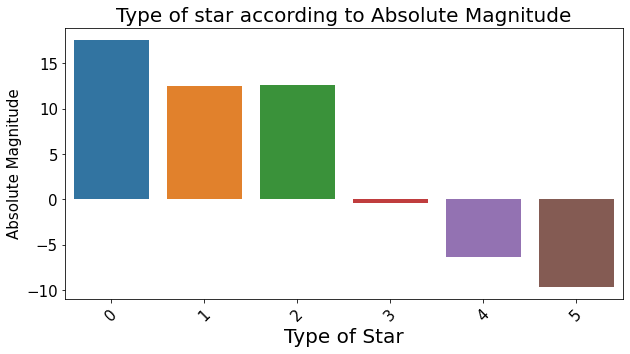

In [31]:
plt.figure(figsize=(10,5))
plt.title('Type of star according to Absolute Magnitude',fontsize = 20)
sns.barplot(x = 'Type',y = 'A_M',data = am)
plt.xticks(rotation = 45 , fontsize = 15)  
plt.yticks(fontsize = 15) 
plt.xlabel("Type of Star",fontsize = 20)
plt.ylabel("Absolute Magnitude",fontsize = 15)
plt.show()

We can see Absolute Magnitude of Type 0,1,2 Stars are Positive, Tyoe 3 is almost nearing 0 while Type 4,5 is Negative.

### Analysis on Spectral Class

In [32]:
df['Spectral_Class'].value_counts()

M    111
B     46
O     40
A     19
F     17
K      6
G      1
Name: Spectral_Class, dtype: int64

#### Vizualizations

In [33]:
spec = df[["Spectral_Class","Type"]].groupby(["Spectral_Class"]).mean()
spec

,Type
Spectral_Class,
A,2.842105
B,2.826087
F,2.470588
G,5.000000
K,3.666667
M,1.675676
O,4.025000


In [34]:
from statsmodels.graphics.mosaicplot import mosaic

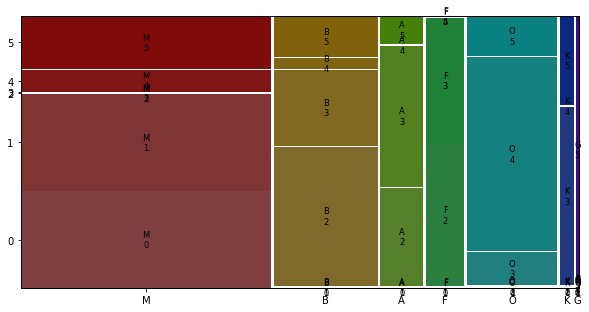

In [35]:
n, m = 10,5

with plt.rc_context():
    plt.rc("figure", figsize=(n,m))
    mosaic(df, ['Spectral_Class', 'Type'])

### Analysis on Color

In [36]:
df["Color"].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
Yellowish White         3
white                   3
Whitish                 2
Orange                  2
yellowish               2
Yellowish               1
White-Yellow            1
Pale yellow orange      1
Blue-White              1
Orange-Red              1
Name: Color, dtype: int64

In [37]:
for i, data in df.iterrows():
    if data["Color"]=='Blue white':
        df.at[i,"Color"]="Blue White"
    elif data["Color"]=='Blue-white':
        df.at[i,"Color"]="Blue White"
    elif data["Color"]=='Blue-White':
        df.at[i,"Color"]="Blue White"
    elif data["Color"]=="White-Yellow":
        df.at[i,"Color"]="Yellowish White"
    elif data["Color"]=="yellow-white":
        df.at[i,"Color"]="Yellowish White"
    elif data["Color"]=='yellowish':
        df.at[i,"Color"]="Yellowish"
    elif data["Color"]=='white':
        df.at[i,"Color"]="White"
    elif data["Color"]=="Whitish":
        df.at[i,"Color"]="White"
    elif data["Color"]=='Pale yellow orange':
        df.at[i,"Color"]="Yellowish"
    elif data["Color"]=="Orange-Red":
        df.at[i,"Color"]="Orange"

In [38]:
df["Color"].value_counts()

Red                112
Blue                56
Blue White          41
White               12
Yellowish White     12
Yellowish            4
Orange               3
Name: Color, dtype: int64

#### Vizualizations

In [39]:
col = df[["Color","Type"]].groupby(["Color"]).mean()
col

,Type
Color,
Blue,3.571429
Blue White,2.951220
Orange,4.333333
Red,1.705357
White,2.666667
Yellowish,2.750000
Yellowish White,2.666667


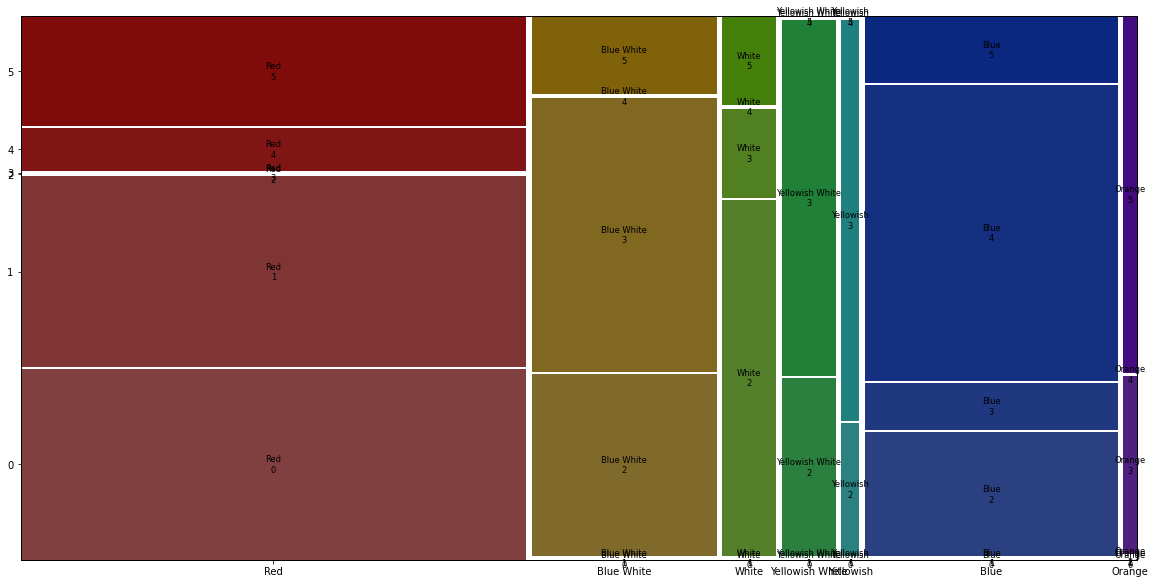

In [40]:
n, m = 20,10

with plt.rc_context():
    plt.rc("figure", figsize=(n,m))
    mosaic(df, ['Color', 'Type'])

### Checking for Correlation

In [41]:
corr=df.corr()
corr

,Temperature,L,R,A_M,Type
Temperature,1.000000,0.378354,0.153966,-0.421727,0.415520
L,0.378354,1.000000,0.774561,-0.761123,0.739703
R,0.153966,0.774561,1.000000,-0.791000,0.809986
A_M,-0.421727,-0.761123,-0.791000,1.000000,-0.955276
Type,0.415520,0.739703,0.809986,-0.955276,1.000000


<AxesSubplot:>

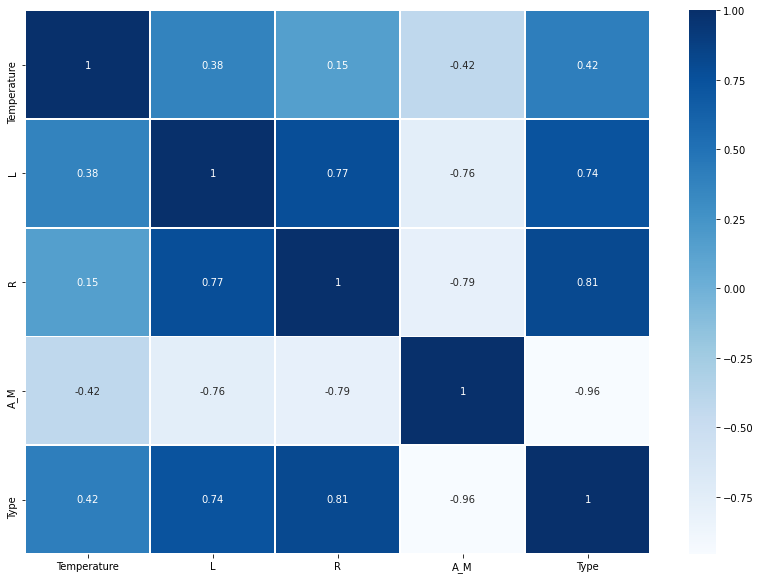

In [42]:
colormap=plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap=colormap, annot=True, linewidth=0.9)

In [43]:
df.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


##### The correlation plot and correlation matrix doesnot show all the attributes we need to go for further processing

### Encoding
##### In the dataset since we have 2 columns with Categorical values. We need to Encode them

In [44]:
df["Color"]=df["Color"].astype("category")
df["Color_encode"]=df["Color"].cat.codes
df["Spectral_Class"]=df["Spectral_Class"].astype("category")
df["Spectral_Class_encode"]=df['Spectral_Class'].cat.codes

In [45]:
df2=df.drop(["Color","Spectral_Class"],axis=1)

In [46]:
df2.head()

,Temperature,L,R,A_M,Type,Color_encode,Spectral_Class_encode
0,3068,0.002400,0.1700,16.12,0,3,5
1,3042,0.000500,0.1542,16.60,0,3,5
2,2600,0.000300,0.1020,18.70,0,3,5
3,2800,0.000200,0.1600,16.65,0,3,5
4,1939,0.000138,0.1030,20.06,0,3,5


In [47]:
df2.to_csv("E:\\Anuya\\Star_encode.csv")

In [48]:
corr=df.corr()
corr

,Temperature,L,R,A_M,Type,Color_encode,Spectral_Class_encode
Temperature,1.000000,0.378354,0.153966,-0.421727,0.415520,-0.693415,-0.238798
L,0.378354,1.000000,0.774561,-0.761123,0.739703,-0.392380,0.311465
R,0.153966,0.774561,1.000000,-0.791000,0.809986,-0.206737,0.247266
A_M,-0.421727,-0.761123,-0.791000,1.000000,-0.955276,0.364678,-0.085840
Type,0.415520,0.739703,0.809986,-0.955276,1.000000,-0.316177,-0.049131
Color_encode,-0.693415,-0.392380,-0.206737,0.364678,-0.316177,1.000000,0.012661
Spectral_Class_encode,-0.238798,0.311465,0.247266,-0.085840,-0.049131,0.012661,1.000000


<AxesSubplot:>

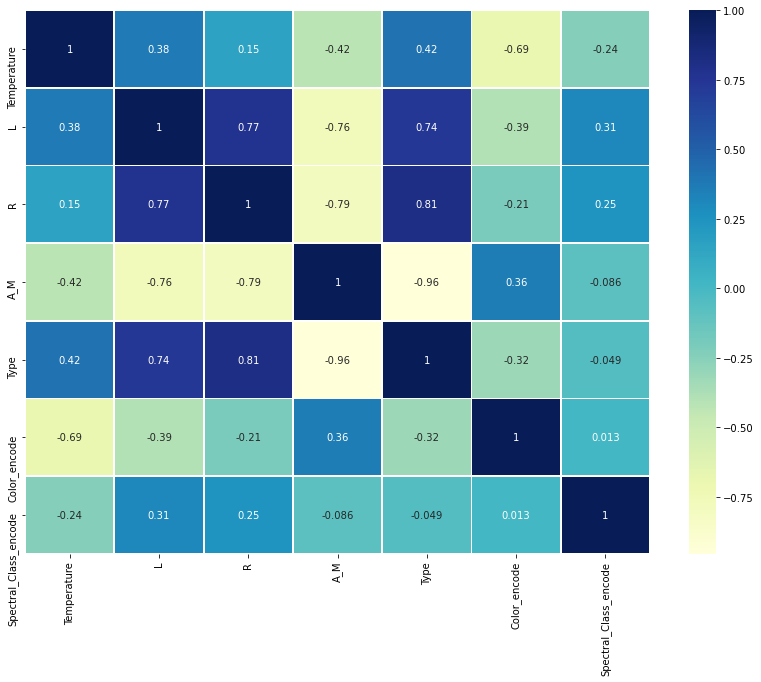

In [49]:
colormap=plt.cm.YlGnBu
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),cmap=colormap, annot=True, linewidth=0.9)

### Creating Training and Testing datasets

##### After Encoding the Categorical variables the original Columns should be removed.
This can aslo be eleminated by specifying only the needed columns in X variable. But here I chose to remove them

In [50]:
df=df.drop(["Color", "Spectral_Class"], axis=1)

In [51]:
df.head()

,Temperature,L,R,A_M,Type,Color_encode,Spectral_Class_encode
0,3068,0.002400,0.1700,16.12,0,3,5
1,3042,0.000500,0.1542,16.60,0,3,5
2,2600,0.000300,0.1020,18.70,0,3,5
3,2800,0.000200,0.1600,16.65,0,3,5
4,1939,0.000138,0.1030,20.06,0,3,5


In [52]:
X=df.drop("Type",axis=1) 
X

,Temperature,L,R,A_M,Color_encode,Spectral_Class_encode
0,3068,0.002400,0.170000,16.12,3,5
1,3042,0.000500,0.154200,16.60,3,5
2,2600,0.000300,0.102000,18.70,3,5
3,2800,0.000200,0.160000,16.65,3,5
4,1939,0.000138,0.103000,20.06,3,5
...,...,...,...,...,...,...
235,32622,374830.000000,106.720875,-9.93,0,6
236,30839,495124.998703,106.720875,-10.63,0,6
237,8829,495124.998703,106.720875,-10.73,4,0
238,9235,404940.000000,106.720875,-11.23,4,0


In [53]:
y=df["Type"]
y

0      0
1      0
2      0
3      0
4      0
      ..
235    5
236    5
237    5
238    5
239    5
Name: Type, Length: 240, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=0)

## Naive bayes Model

In [55]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [56]:
y_pred=model.predict(X_test)

In [57]:
y_pred

array([4, 1, 2, 1, 4, 4, 3, 4, 3, 1, 0, 2, 2, 3, 5, 1, 1, 5, 4, 0, 4, 5,
       2, 0, 0, 2, 1, 2, 1, 4, 5, 4, 2, 0, 2, 5, 2, 5, 0, 1, 3, 4, 2, 1,
       4, 1, 3, 0, 5, 5, 0, 3, 5, 1, 2, 3, 5, 3, 5, 4, 1, 3, 2, 5, 2, 3,
       0, 3, 0, 1, 2, 4], dtype=int64)

In [58]:
y_test

109    4
71     1
37     3
74     1
108    4
      ..
218    3
129    0
73     1
4      0
107    4
Name: Type, Length: 72, dtype: int64

### Creating Confusion Matrix to test the accuracy Naive Bayes Classification model

In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm1=confusion_matrix(y_test, y_pred)
ac1=accuracy_score(y_test, y_pred)

In [60]:
cm1

array([[ 8,  1,  1,  0,  0,  0],
       [ 2, 11,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0],
       [ 0,  1,  5, 10,  0,  0],
       [ 0,  0,  0,  1, 12,  0],
       [ 0,  0,  0,  0,  0, 12]], dtype=int64)

In [61]:
cr1=classification_report(y_test, y_pred)
print(cr1)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        10
           1       0.85      0.85      0.85        13
           2       0.57      1.00      0.73         8
           3       0.91      0.62      0.74        16
           4       1.00      0.92      0.96        13
           5       1.00      1.00      1.00        12

    accuracy                           0.85        72
   macro avg       0.85      0.87      0.85        72
weighted avg       0.88      0.85      0.85        72



In [62]:
print("Accuracy of Naive Bayes Classification Model: ", ac1*100, "%")

Accuracy of Naive Bayes Classification Model:  84.72222222222221 %


### To test external values for Naive Bayes Classification

In [63]:
Xnew=([[10009,0.04,200.6,5,8,4],[3006,12.7,1.8,1.7,5,6]])
y_pred=model.predict(Xnew)
y_pred

array([4, 1], dtype=int64)

## KNN Model

In [64]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train2=sc.fit_transform(X_train)
X_test2=sc.transform(X_test)

In [65]:
from sklearn.neighbors import KNeighborsClassifier
model2=KNeighborsClassifier(n_neighbors=10)
model2.fit(X_train2, y_train)

KNeighborsClassifier(n_neighbors=10)

In [66]:
y_pred2=model2.predict(X_test2)

In [67]:
y_pred2

array([4, 1, 3, 1, 4, 4, 3, 4, 3, 1, 1, 2, 2, 3, 5, 1, 0, 5, 4, 0, 3, 4,
       2, 0, 0, 2, 1, 3, 1, 4, 5, 4, 2, 0, 2, 5, 2, 5, 0, 3, 3, 4, 3, 1,
       4, 1, 4, 0, 5, 4, 0, 3, 5, 1, 1, 2, 4, 3, 5, 4, 1, 4, 2, 5, 2, 3,
       1, 3, 0, 1, 0, 4], dtype=int64)

### Testing accuracy of KNN Model

In [68]:
cm2=confusion_matrix(y_test, y_pred2)
ac2=accuracy_score(y_test, y_pred2)

In [69]:
cm2

array([[10,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0],
       [ 0,  1,  2, 12,  1,  0],
       [ 0,  0,  0,  1, 12,  0],
       [ 0,  0,  0,  0,  3,  9]], dtype=int64)

In [70]:
cr2=classification_report(y_test, y_pred2)
print(cr2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       0.80      1.00      0.89         8
           3       0.92      0.75      0.83        16
           4       0.75      0.92      0.83        13
           5       1.00      0.75      0.86        12

    accuracy                           0.89        72
   macro avg       0.90      0.90      0.89        72
weighted avg       0.90      0.89      0.89        72



In [71]:
print("Accuracy of KNN Model: ", ac2*100, "%")

Accuracy of KNN Model:  88.88888888888889 %


### To test external values for KNN Model

In [72]:
Xnew2=([[10009,0.04,200.6,5,8,4],[3006,12.7,1.8,1.7,5,6]])
Xnew2=sc.transform(Xnew2)
y_pred2=model2.predict(Xnew2)
y_pred2

array([5, 1], dtype=int64)

### KNN Model using MinMax Scaler

In [73]:
from sklearn.preprocessing import MinMaxScaler
sc2=MinMaxScaler()
X_train2=sc2.fit_transform(X_train)
X_test2=sc2.transform(X_test)

In [74]:
from sklearn.neighbors import KNeighborsClassifier
model3=KNeighborsClassifier(n_neighbors=10)
model3.fit(X_train2, y_train)

KNeighborsClassifier(n_neighbors=10)

In [75]:
y_pred3=model3.predict(X_test2)

In [76]:
y_pred3

array([4, 1, 2, 1, 4, 4, 3, 4, 3, 1, 1, 2, 2, 3, 5, 1, 0, 5, 4, 0, 4, 5,
       2, 0, 0, 2, 1, 2, 1, 4, 5, 4, 2, 0, 2, 5, 2, 5, 0, 1, 3, 4, 3, 1,
       4, 1, 4, 0, 5, 4, 0, 3, 5, 1, 1, 2, 4, 3, 5, 4, 1, 4, 2, 5, 2, 3,
       1, 3, 0, 1, 0, 4], dtype=int64)

### Testing the accuracy of the model

In [77]:
cm3=confusion_matrix(y_test, y_pred3)
ac3=accuracy_score(y_test, y_pred3)

In [78]:
cm3

array([[10,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0],
       [ 0,  2,  4,  9,  1,  0],
       [ 0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  2, 10]], dtype=int64)

In [79]:
cr3=classification_report(y_test, y_pred3)
print(cr3)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.87      1.00      0.93        13
           2       0.67      1.00      0.80         8
           3       1.00      0.56      0.72        16
           4       0.81      1.00      0.90        13
           5       1.00      0.83      0.91        12

    accuracy                           0.88        72
   macro avg       0.89      0.90      0.88        72
weighted avg       0.91      0.88      0.87        72



In [80]:
print("Accuracy of KNN(MinMax Scalar) Model: ", ac3*100, "%")

Accuracy of KNN(MinMax Scalar) Model:  87.5 %


### Testing External Values 

In [81]:
Xnew3=([[10009,0.04,200.6,5,8,4],[3006,12.7,1.8,1.7,5,6]])
Xnew3=sc2.transform(Xnew3)
y_pred3=model3.predict(Xnew3)
y_pred3

array([5, 1], dtype=int64)

### KNN Model using Robust Scaler

In [82]:
from sklearn.preprocessing import RobustScaler
sc3=RobustScaler()
X_train3=sc3.fit_transform(X_train)
X_test3=sc3.transform(X_test)

In [83]:
from sklearn.neighbors import KNeighborsClassifier
model4=KNeighborsClassifier(n_neighbors=10)
model4.fit(X_train3, y_train)

KNeighborsClassifier(n_neighbors=10)

In [84]:
y_pred4=model4.predict(X_test3)

In [85]:
y_pred4

array([4, 1, 3, 1, 4, 4, 3, 4, 3, 1, 1, 2, 2, 3, 4, 1, 0, 5, 4, 0, 4, 4,
       2, 0, 0, 2, 1, 2, 1, 4, 5, 4, 2, 0, 2, 5, 2, 5, 0, 3, 3, 4, 3, 1,
       4, 1, 4, 0, 5, 4, 0, 3, 4, 1, 1, 2, 4, 3, 5, 4, 1, 3, 3, 5, 2, 2,
       0, 3, 0, 1, 0, 4], dtype=int64)

### Testing the accuracy of the model

In [86]:
cm4=confusion_matrix(y_test, y_pred4)
ac4=accuracy_score(y_test, y_pred4)

In [87]:
cm4

array([[10,  0,  0,  0,  0,  0],
       [ 1, 12,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0],
       [ 0,  1,  3, 12,  0,  0],
       [ 0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  5,  7]], dtype=int64)

In [88]:
cr4=classification_report(y_test, y_pred4)
print(cr4)

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       0.92      0.92      0.92        13
           2       0.73      1.00      0.84         8
           3       1.00      0.75      0.86        16
           4       0.72      1.00      0.84        13
           5       1.00      0.58      0.74        12

    accuracy                           0.86        72
   macro avg       0.88      0.88      0.86        72
weighted avg       0.89      0.86      0.86        72



In [89]:
print("Accuracy of KNN(Robust Scalar) Model: ", ac4*100, "%")

Accuracy of KNN(Robust Scalar) Model:  86.11111111111111 %


### Testing External Values

In [90]:
Xnew4=([[10009,0.04,200.6,5,8,4],[3006,12.7,1.8,1.7,5,6]])
Xnew4=sc3.transform(Xnew4)
y_pred4=model4.predict(Xnew4)
y_pred4

array([5, 1], dtype=int64)

### Random Forest

In [91]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [93]:
y_pred5=rfc.predict(X_test)
y_pred5

array([4, 1, 3, 1, 4, 4, 3, 4, 3, 1, 1, 2, 2, 3, 5, 1, 0, 5, 4, 0, 4, 5,
       2, 0, 0, 2, 1, 3, 1, 4, 5, 4, 2, 0, 2, 5, 2, 5, 0, 1, 3, 4, 3, 1,
       4, 1, 4, 0, 5, 5, 0, 3, 5, 1, 3, 3, 5, 3, 5, 4, 1, 3, 3, 5, 2, 3,
       1, 3, 0, 1, 0, 4], dtype=int64)

### Testing Accuracy of the model

In [94]:
cm5=confusion_matrix(y_test, y_pred5)
ac5=accuracy_score(y_test, y_pred5)

In [95]:
cm5

array([[10,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0],
       [ 0,  0,  8,  0,  0,  0],
       [ 0,  1,  0, 15,  0,  0],
       [ 0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0, 12]], dtype=int64)

In [96]:
cr5=classification_report(y_test, y_pred5)
print(cr5)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         8
           3       1.00      0.94      0.97        16
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



In [97]:
print("Accuracy of Random Forest Classifier : ", ac5*100, "%")

Accuracy of Random Forest Classifier :  98.61111111111111 %


### Testing External Values

In [98]:
Xnew5=([[10009,0.04,200.6,5,8,4],[3006,12.7,1.8,1.7,5,6]])
Xnew5=sc.transform(Xnew5)
y_pred5=model4.predict(Xnew5)
y_pred5

array([5, 3], dtype=int64)

### SVM Model

In [99]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train2, y_train)

SVC()

In [100]:
y_pred6 = svm.predict(X_test2)

In [101]:
y_pred6

array([4, 1, 3, 1, 4, 4, 3, 4, 3, 1, 1, 2, 2, 3, 5, 1, 0, 5, 4, 0, 3, 5,
       2, 0, 0, 2, 0, 3, 1, 4, 5, 4, 2, 0, 2, 5, 2, 5, 0, 3, 3, 4, 3, 1,
       4, 1, 4, 0, 5, 5, 0, 3, 5, 1, 1, 3, 5, 3, 5, 4, 1, 3, 3, 5, 2, 3,
       0, 3, 0, 1, 0, 4], dtype=int64)

### Testing the accuracy of SVM Model

In [102]:
cm6 = confusion_matrix(y_pred6, y_test)
ac6 = accuracy_score(y_test, y_pred6)

In [103]:
cm6

array([[10,  2,  0,  0,  0,  0],
       [ 0, 11,  0,  1,  0,  0],
       [ 0,  0,  8,  0,  0,  0],
       [ 0,  0,  0, 15,  1,  0],
       [ 0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  0, 12]], dtype=int64)

In [104]:
cr6=classification_report(y_test, y_pred6)
print(cr6)

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        10
           1       0.92      0.85      0.88        13
           2       1.00      1.00      1.00         8
           3       0.94      0.94      0.94        16
           4       1.00      0.92      0.96        13
           5       1.00      1.00      1.00        12

    accuracy                           0.94        72
   macro avg       0.95      0.95      0.95        72
weighted avg       0.95      0.94      0.94        72



In [105]:
print("Accuracy of SVM Model: ", ac6*100, "%")

Accuracy of SVM Model:  94.44444444444444 %


### Testing External Values

In [106]:
Xnew6=([[10009,0.04,200.6,5,8,4],[3006,12.7,1.8,1.7,5,6]])
Xnew6=sc2.transform(Xnew6)
y_pred6=svm.predict(Xnew6)
y_pred6

array([5, 1], dtype=int64)

### Decision Tree Classifier

In [107]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [108]:
y_pred7 = clf.predict(X_test)

In [109]:
y_pred7

array([4, 1, 3, 1, 4, 4, 3, 4, 3, 1, 1, 2, 2, 3, 5, 1, 0, 5, 4, 0, 4, 5,
       2, 0, 0, 2, 1, 3, 1, 4, 5, 4, 2, 0, 2, 5, 2, 5, 0, 1, 3, 4, 3, 1,
       4, 1, 4, 0, 5, 5, 0, 3, 5, 1, 3, 3, 5, 3, 5, 4, 1, 3, 3, 5, 2, 3,
       1, 3, 0, 1, 0, 4], dtype=int64)

### Testing the accuracy of Decision Tree

In [110]:
cm7 = confusion_matrix(y_pred7, y_test)
ac7 = accuracy_score(y_test, y_pred7)

In [111]:
cm7

array([[10,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  1,  0,  0],
       [ 0,  0,  8,  0,  0,  0],
       [ 0,  0,  0, 15,  0,  0],
       [ 0,  0,  0,  0, 13,  0],
       [ 0,  0,  0,  0,  0, 12]], dtype=int64)

In [112]:
cr7=classification_report(y_test, y_pred7)
print(cr7)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.93      1.00      0.96        13
           2       1.00      1.00      1.00         8
           3       1.00      0.94      0.97        16
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        12

    accuracy                           0.99        72
   macro avg       0.99      0.99      0.99        72
weighted avg       0.99      0.99      0.99        72



In [113]:
print("Accuracy of Decision Tree Classifier: ", ac7*100, "%")

Accuracy of Decision Tree Classifier:  98.61111111111111 %


### Testing External Values

In [114]:
Xnew7=([[10009,0.04,200.6,5,8,4],[3006,12.7,1.8,1.7,5,6]])
Xnew7=sc2.transform(Xnew7)
y_pred7=clf.predict(Xnew7)
y_pred7

array([1, 2], dtype=int64)

In [115]:
print("                                 SUMMARY \n")
print("   NAME OF THE MODEL\t\t      ACCURACY")
print("Naive Bayes Classification Model:   ","{:.2f}".format(ac1*100)," %")
print("KNN Model using Standard Scaler:    ","{:.2f}".format(ac2*100)," %")
print("KNN Model using MinMax Scaler:      ","{:.2f}".format(ac3*100)," %")
print("KNN Model using Robust Scaler:      ","{:.2f}".format(ac4*100)," %")
print("Random Forest Classification Model: ","{:.2f}".format(ac5*100),"%")
print("SVM Model :                         ","{:.2f}".format(ac6*100)," %")
print("Decision Tree Classifier Model:     ","{:.2f}".format(ac7*100),"%")

print("\nThis shows that the most accurate model we got is Random Forest Classification Model and Decision Tree Classifier Model")

                                 SUMMARY 

   NAME OF THE MODEL		      ACCURACY
Naive Bayes Classification Model:    84.72  %
KNN Model using Standard Scaler:     88.89  %
KNN Model using MinMax Scaler:       87.50  %
KNN Model using Robust Scaler:       86.11  %
Random Forest Classification Model:  98.61 %
SVM Model :                          94.44  %
Decision Tree Classifier Model:      98.61 %

This shows that the most accurate model we got is Random Forest Classification Model and Decision Tree Classifier Model
